## LightGBM应用

In [1]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据集
breast = load_breast_cancer()
# 获取特征值和目标指
X,y = breast.data,breast.target
# 获取特征名称
feature_name = breast.feature_names

In [3]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# 数据格式转换
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [5]:
# 参数设置
boost_round = 50 # 迭代次数              
early_stop_rounds = 10 # 验证数据若在early_stop_rounds轮中未提高，则提前停止

params = {
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [6]:
# 模型训练:加入提前停止的功能
results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_eval, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results)

[1]	train's auc: 0.98371	train's l2: 0.212923	validate's auc: 0.977136	validate's l2: 0.225633
Training until validation scores don't improve for 10 rounds
[2]	train's auc: 0.986656	train's l2: 0.196528	validate's auc: 0.987298	validate's l2: 0.208179
[3]	train's auc: 0.991202	train's l2: 0.181997	validate's auc: 0.992061	validate's l2: 0.193176
[4]	train's auc: 0.990355	train's l2: 0.168489	validate's auc: 0.993966	validate's l2: 0.178797
[5]	train's auc: 0.990199	train's l2: 0.156395	validate's auc: 0.993331	validate's l2: 0.166016
[6]	train's auc: 0.992111	train's l2: 0.145357	validate's auc: 0.993649	validate's l2: 0.15471
[7]	train's auc: 0.99419	train's l2: 0.134451	validate's auc: 0.995713	validate's l2: 0.142437
[8]	train's auc: 0.994378	train's l2: 0.124897	validate's auc: 0.99603	validate's l2: 0.132029
[9]	train's auc: 0.99396	train's l2: 0.11629	validate's auc: 0.996348	validate's l2: 0.122358
[10]	train's auc: 0.994253	train's l2: 0.108488	validate's auc: 0.996666	validate

In [7]:
# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred

array([0.47667033, 0.71765919, 0.78008311, 0.78218089, 0.77464283,
       0.78361947, 0.7363839 , 0.78348696, 0.76587979, 0.78153982,
       0.69750086, 0.74346082, 0.78220069, 0.50560155, 0.68333607,
       0.42582199, 0.77283209, 0.3790628 , 0.38329039, 0.38314727,
       0.42888551, 0.38879762, 0.76841939, 0.77598851, 0.41389426,
       0.78487704, 0.78140964, 0.49410626, 0.78487704, 0.38085601,
       0.77270264, 0.41389426, 0.76400592, 0.4662295 , 0.78105148,
       0.46174716, 0.77597846, 0.47010583, 0.79817673, 0.38831078,
       0.59362945, 0.78446138, 0.50560155, 0.77213112, 0.5547406 ,
       0.38318047, 0.78134479, 0.7518956 , 0.7814846 , 0.39086403,
       0.38329039, 0.42611125, 0.43259992, 0.78313035, 0.78056681,
       0.78352387, 0.7518132 , 0.76587979, 0.75924622, 0.38090643,
       0.49725109, 0.3718826 , 0.77962488, 0.78297714, 0.38322716,
       0.70222126, 0.38121845, 0.38149471, 0.38533052, 0.76821859,
       0.62409559, 0.38089414, 0.77640719, 0.65813902, 0.41389

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: more than one metric available, picking one to plot.
  


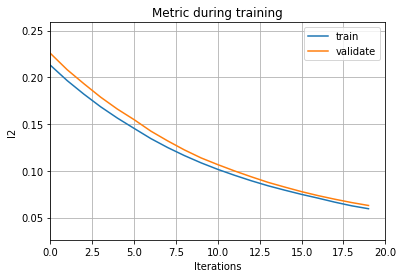

In [8]:
# 模型评估
lgb.plot_metric(results)
plt.show()

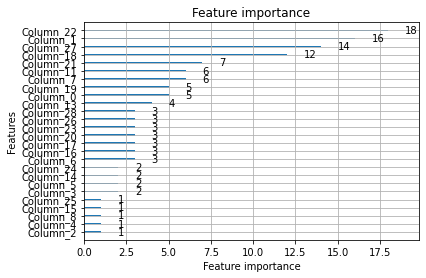

In [9]:
# 绘制重要的特征
lgb.plot_importance(gbm,importance_type = "split")
plt.show()